In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('./Archive (1)')

### prob 1
The zip file contains 9 files. For the mock data 1 to mock data 6, plot
their histograms (play with bin sizes and find an appropriate bin-size)
and try to have a guess from what distribution these data are drawn.

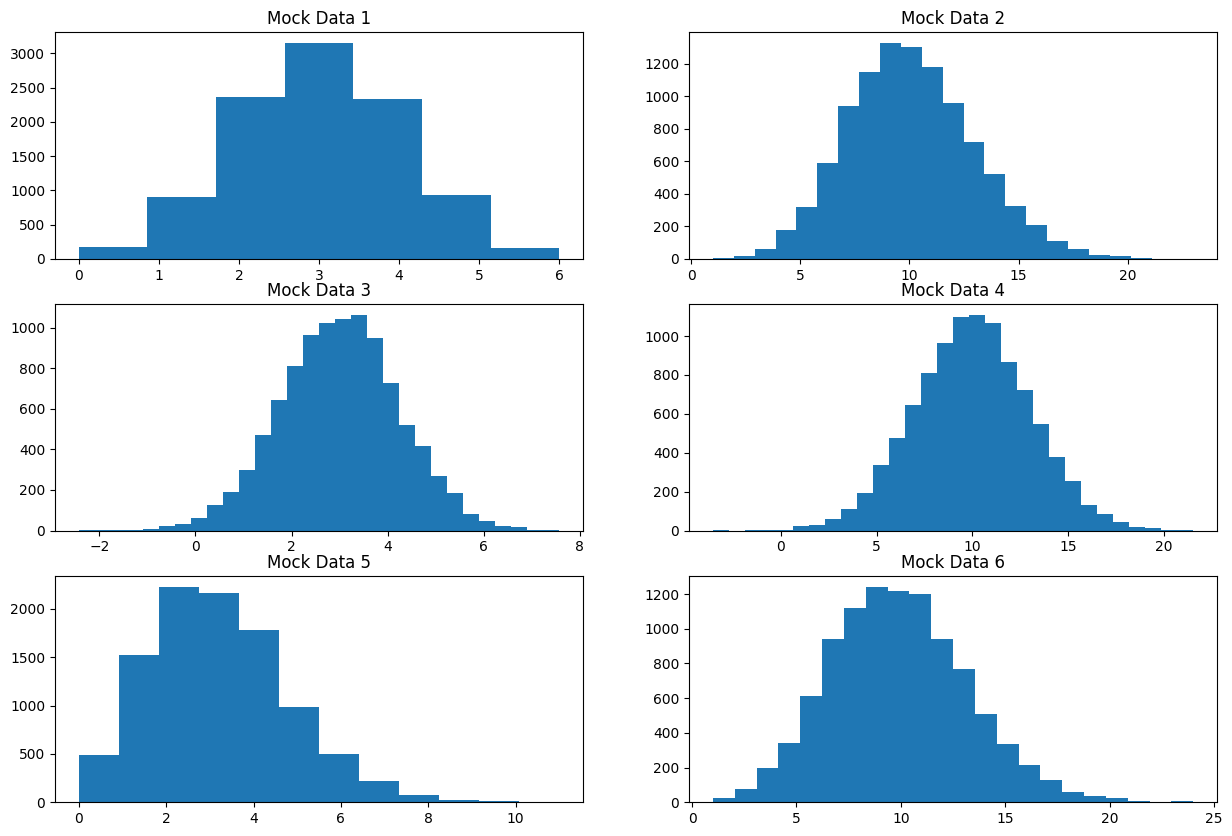

In [27]:
filename = 'mock_data_'
fig, ax = plt.subplots(3,2, figsize=(15,10))
for i in range(1, 7):
    data = np.loadtxt(f'{filename}{i}.txt')
    binsize=[7,23,30,30,12,22]
    ax[(i-1)//2, (i-1)%2].hist(data, bins=binsize[i-1])
    ax[(i-1)//2, (i-1)%2].set_title(f'Mock Data {i}')

### prob 2
For the mock data A, mock data B and mock data C, plot the data and
calculate the correlation coefficient.

In [6]:
from func import *

In [5]:
def correlcalc(x,y):
    n = len(x)
    mean_x = mean(x)
    mean_y = mean(y)
    cov = np.sum((x - mean_x) * (y - mean_y)) / n
    rho = cov / (std(x) * std(y))
    return rho

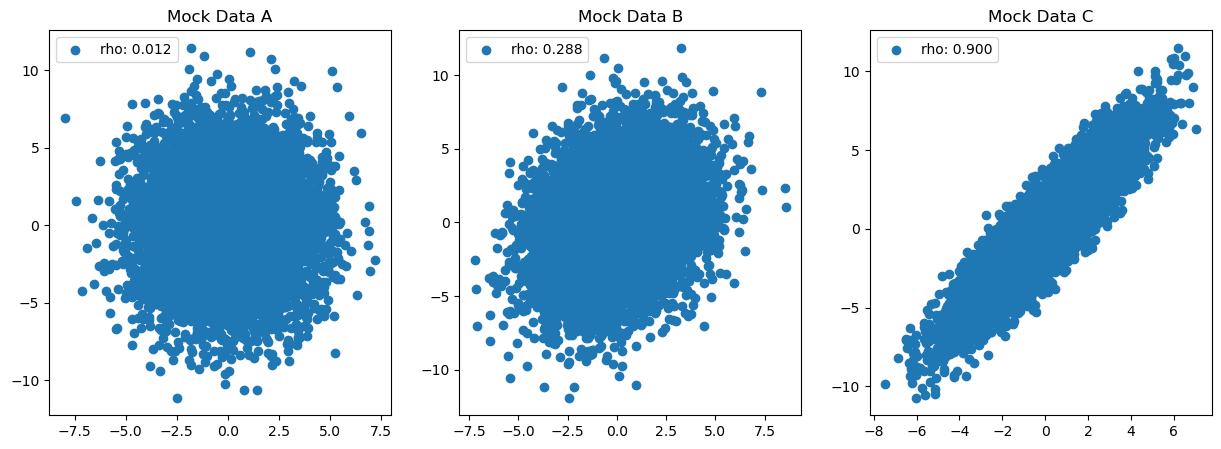

In [14]:
filename = 'mock_data_'
suffix = ['A', 'B', 'C']
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    data = np.loadtxt(f'{filename}{suffix[i]}.txt')
    rho = correlcalc(data[:,0], data[:,1])
    ax[i].scatter(data[:,0], data[:,1], label = f'rho: {rho:.3f}')
    ax[i].set_title(f'Mock Data {suffix[i]}')
    ax[i].legend()

### prob 3
We want to track cosmic rays with some detectors which are 90% effi-
cient. We need to detect cosmic rays with at least 3 detectors to define
their tracks. Calculate how often we can detect a track (having 3 detec-
tion) using a stack of 3 detectors? How things will change if we use 4 or
5 or 6 detectors?

### prob 5
Calculate the mean and standard deviation for the skewness and Kurtosis
of the subsets you analysed in Homework 1.

In [3]:
os.chdir('..')
os.path.abspath(os.curdir)

'/Users/john1256/KASI_Ms/2025/Statistics_1'

In [4]:
data = []
for i in range(1,5):
    data.append(np.loadtxt(f'mock_data_{i}.txt'))

In [7]:
stats2 = {'mean' : [], 'geom_mean': [], 'median': [],
         'variance': [], 'std': [], 
         'skewness': [], 'kurtosis': []
         }
subset_size = 1000
i=0
for i in range(4):
    j=0
    data_shuffle = np.random.permutation(data[i])
    mean_subset = []
    geom_mean_subset = []
    median_subset = []
    variance_subset = []
    std_subset = []
    skewness_subset = []
    kurtosis_subset = []
    for j in range(10):
        subset = data_shuffle[j:j+subset_size]
        mean_subset.append(mean(subset))
        geom_mean_subset.append(geom_mean(subset))
        median_subset.append(median(subset))
        variance_subset.append(variance(subset))
        std_subset.append(std(subset))
        skewness_subset.append(skewness(subset))
        kurtosis_subset.append(kurtosis(subset))
        j+=1
    stats2['mean'].append(np.array(mean_subset))
    stats2['geom_mean'].append(np.array(geom_mean_subset))
    stats2['median'].append(np.array(median_subset))
    stats2['variance'].append(np.array(variance_subset))
    stats2['std'].append(np.array(std_subset))
    stats2['skewness'].append(np.array(skewness_subset))
    stats2['kurtosis'].append(np.array(kurtosis_subset))
    i+=1

In [15]:
std(stats2['skewness'][3])

0.008743404449304656

In [9]:
for i in range(4):
    print(f'For mock data {i+1}:')
    mean_skew = mean(stats2['skewness'][i]); std_skew = std(np.array(stats2['skewness'][i]))
    mean_kurt = mean(stats2['kurtosis'][i]); std_kurt = std(np.array(stats2['kurtosis'][i]))
    print(f'Skewness: mean = {mean_skew:.3f}, std = {std_skew:.3f}')
    print(f'Kurtosis: mean = {mean_kurt:.3f}, std = {std_kurt:.3f}')
    print("skewness of the mother distribution :", skewness(data[i])//0.001/1000)
    print("kurtosis of the mother distribution :", kurtosis(data[i])//0.001/1000)

For mock data 1:
Skewness: mean = 0.024, std = 0.002
Kurtosis: mean = 0.045, std = 0.004
skewness of the mother distribution : 0.011
kurtosis of the mother distribution : 0.024
For mock data 2:
Skewness: mean = 0.056, std = 0.003
Kurtosis: mean = 0.035, std = 0.004
skewness of the mother distribution : 0.061
kurtosis of the mother distribution : -0.043
For mock data 3:
Skewness: mean = 0.246, std = 0.002
Kurtosis: mean = -0.051, std = 0.005
skewness of the mother distribution : 0.262
kurtosis of the mother distribution : -0.007
For mock data 4:
Skewness: mean = 1.338, std = 0.009
Kurtosis: mean = 2.502, std = 0.027
skewness of the mother distribution : 1.385
kurtosis of the mother distribution : 2.917


(array([3., 1., 1., 3., 2.]),
 array([1.32419957, 1.32935577, 1.33451197, 1.33966817, 1.34482437,
        1.34998057]),
 <BarContainer object of 5 artists>)

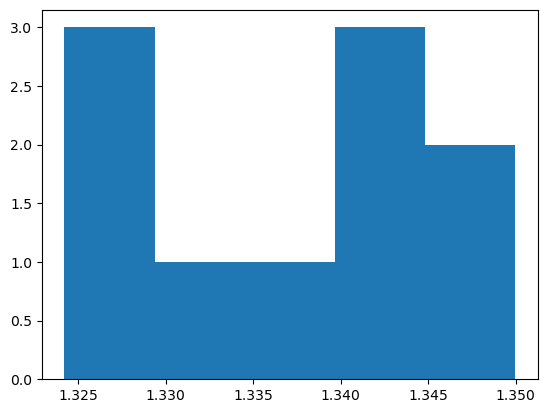

In [20]:
plt.hist(stats2['skewness'][3], bins=5)